<a href="https://colab.research.google.com/github/Mjcherono/HousePricePredictionsLinear/blob/main/IPWeek_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Defining the Question

####a. Specifying the Question

######This is a study for the factors that affect housing prices using the data on a real estate property then creating a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.*italicised text*

#### b.Defining the metricfor success.

######We'll consider our model a success when it is able to accurately predict the respective prices and have a significantly correct accuracy when evaluated

####c.Understanding the context.

######Hass Consulting Company is a real estate leader company that does house prices consultation services to clients. They do researches on how to price houses in different locations in the US and need this research as a guide to future house pricing prediction.

####d.Recording the Experimental Design



1.   Perform Data Cleaning
2.   Performing EDA.
3.   Perform Feature Enginnering
4.   Check for multicollinearity
5.   Build model
6.   Calculate MSEs and R square
7.   Create residual plot and assess heteroskedasticity.



####e. Data Relevance.

######The data was collected by Hass Consulting Comapany for the study from regions of their business focus and on houses they concentrate on working on. The provided data is relevant enough for the research.

####f.Appropriateness of Data

######The provided data is appropriate except that it had a few outliers that were eradicated. The outliers were not that much to cause a big effect on the research

###Importing Data

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import scipy as sp



In [ ]:
#importing data
house_prices = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
house_prices

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
house_prices.grade.nunique()

12

In [ ]:
#pip install zipcodes


In [ ]:
#from pprint import pprint
#import zipcodes
#for i, row in house_prices.iterrows():
#  zip_code = house_prices.loc[i,'zipcode']
#  zip_code=zip_code.astype(int)
#  zip_code=zip_code.astype(str)
#  house_prices.loc[i,'city'] = zipcodes.matching(zip_code)[0]["city"]
#  house_prices.loc[i,'county'] = zipcodes.matching(zip_code)[0]['county']  
        
#house_prices.tail()

In [ ]:
house_prices.waterfront.nunique()

2

In [ ]:
house_prices.view.nunique()

5

In [ ]:
#checking on data
print(house_prices.shape)

(21613, 20)


In [ ]:
#data types
house_prices.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
#description
house_prices.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


###Data Preprocessing.

In [ ]:
#dropping unnecessary columns
house_prices.drop(['id','yr_renovated','yr_built','zipcode','lat','long'],1,inplace=True)


In [ ]:
#checking for null values
#df.isnull().sum()
#df.dropna()

house_prices.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#checking for duplicates
#df.duplicated().sum()
house_prices.duplicated().sum()
house_prices.drop_duplicates(inplace=True)

house_prices.duplicated().sum()


0

In [ ]:
#outliers
bedrooms = house_prices['bedrooms'] 

Q3 = bedrooms.quantile(0.75)
Q1 = bedrooms.quantile(0.25)
IQR = Q3-Q1
IQR

house_prices['bedrooms'] = bedrooms[~((bedrooms<(Q1-1.5*IQR)) | (bedrooms>(Q3+1.5*IQR)))]
house_prices.shape

(21606, 14)

In [ ]:
house_prices

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509
21609,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200
21610,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007
21611,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287


In [ ]:
house_prices.isnull().sum()
house_prices.dropna(inplace=True)

house_prices.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
dtype: int64

###Exploratory Data Analysis

####Univariate Analysis.

In [ ]:
#distplotgs
#barplots
#histograms
#piecharts
#linecharts

In [ ]:
house_prices.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

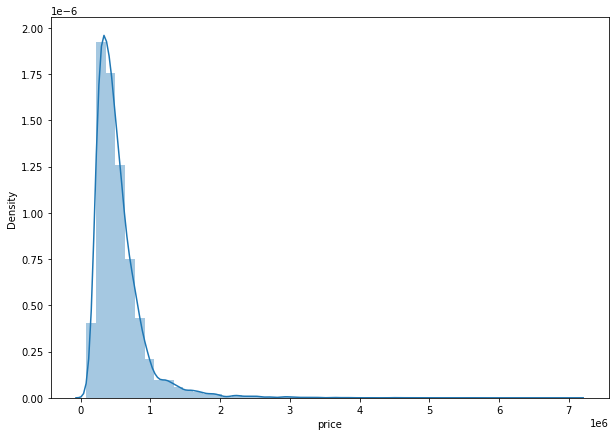

In [ ]:
plt.subplots(figsize=(10,7))
sns.distplot(house_prices.price)

######Most house prices range above 250000 to 600000

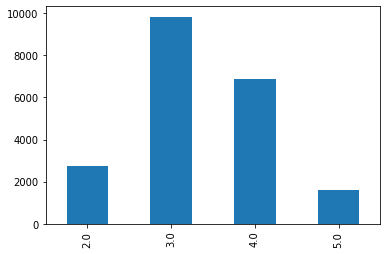

In [ ]:
#checking on the number of houses used for the analysis per number of bedroomas

house_prices['bedrooms'].value_counts().sort_index().plot.bar()


######Most houses used for the study were three bedroomed housses

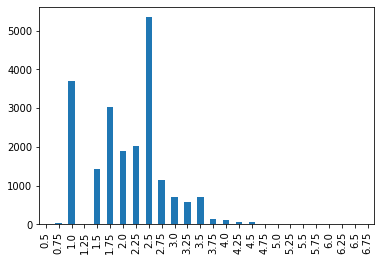

In [ ]:
#checking on the number of houses used for the analysis per number of bathrooms

house_prices['bathrooms'].value_counts().sort_index().plot.bar()


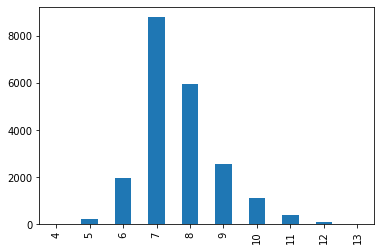

In [ ]:
#checking on the number of houses used for the analysis per number of grade

house_prices['grade'].value_counts().sort_index().plot.bar()


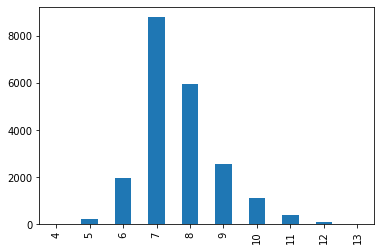

In [ ]:
#checking on the number of houses used for the analysis per number of grade

house_prices['grade'].value_counts().sort_index().plot.bar()


####Bivariate Analysis

#####Multicollinearity

In [ ]:
#heatmap
#pairplot
#correlations = df.corr()

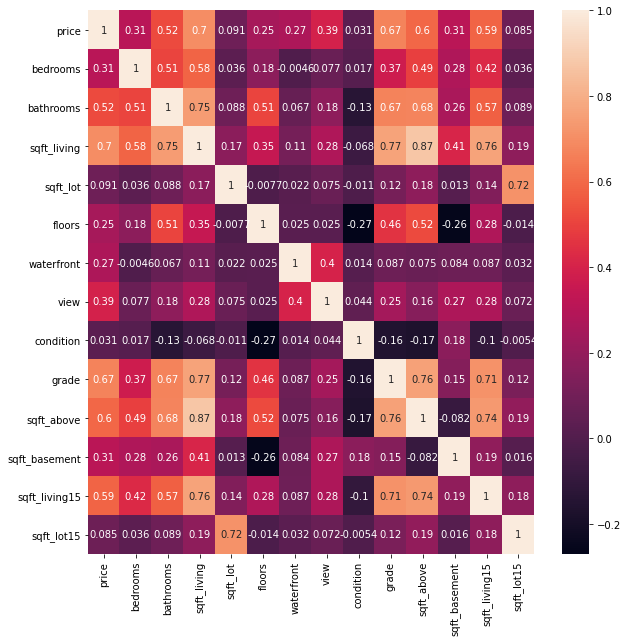

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10,10))
sns.heatmap(house_prices.corr(),annot=True)

In [ ]:
independent = house_prices.drop('price', axis=1)
correlations = independent.corr()
correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
bedrooms,1.000000,0.505010,0.583583,0.036083,0.178574,-0.004555,0.076718,0.017160,0.370631,0.489351,0.279647,0.424745,0.036003
bathrooms,0.505010,1.000000,0.746016,0.088121,0.505526,0.066690,0.183096,-0.134533,0.668973,0.676574,0.261832,0.573806,0.089080
sqft_living,0.583583,0.746016,1.000000,0.173130,0.348947,0.109444,0.279416,-0.068204,0.765845,0.874044,0.412604,0.763573,0.185771
sqft_lot,0.036083,0.088121,0.173130,1.000000,-0.007749,0.021803,0.074639,-0.010886,0.115609,0.182739,0.012532,0.143193,0.715532
floors,0.178574,0.505526,0.348947,-0.007749,1.000000,0.025095,0.024923,-0.270455,0.455436,0.520434,-0.259947,0.276368,-0.014027
waterfront,-0.004555,0.066690,0.109444,0.021803,0.025095,1.000000,0.399987,0.014437,0.086820,0.074847,0.084177,0.086874,0.031726
view,0.076718,0.183096,0.279416,0.074639,0.024923,0.399987,1.000000,0.044310,0.248651,0.159200,0.274694,0.275101,0.072072
condition,0.017160,-0.134533,-0.068204,-0.010886,-0.270455,0.014437,0.044310,1.000000,-0.156748,-0.168504,0.176017,-0.099831,-0.005375
grade,0.370631,0.668973,0.765845,0.115609,0.455436,0.086820,0.248651,-0.156748,1.000000,0.757182,0.151377,0.714246,0.123514
sqft_above,0.489351,0.676574,0.874044,0.182739,0.520434,0.074847,0.159200,-0.168504,0.757182,1.000000,-0.081928,0.735545,0.194630


#####vif

In [ ]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
bedrooms,1.639462,-0.368569,-1.418621e+00,0.041276,0.075716,0.065283,0.115937,-0.082505,0.350335,3.690496e-01,2.038347e-01,-0.060425,0.088076
bathrooms,-0.368569,2.869625,1.478676e+00,-0.012117,-0.844668,0.001139,0.051617,0.071609,-0.493781,-2.401538e+00,-1.641226e+00,0.015278,0.024853
sqft_living,-1.399981,1.477841,-1.412454e+14,-0.470223,7.607916,-0.421784,0.305112,0.121534,-1.595324,1.290959e+14,6.885511e+13,-1.595823,1.543653
sqft_lot,0.041276,-0.012117,-4.711358e-01,2.069257,0.079899,0.031139,-0.057357,0.013237,0.002062,1.915514e-01,2.060568e-01,0.128761,-1.453779
floors,0.075716,-0.844668,7.602387e+00,0.079899,1.900374,-0.008161,-0.033727,0.206148,-0.371667,-7.324758e+00,-3.082991e+00,0.352608,0.089748
waterfront,0.065283,0.001139,-4.206897e-01,0.031139,-0.008161,1.197517,-0.489942,-0.003211,0.046646,2.547537e-01,1.880803e-01,0.068829,-0.020357
view,0.115937,0.051617,2.982610e-01,-0.057357,-0.033727,-0.489942,1.372846,-0.049681,-0.149820,-2.553532e-01,-4.553215e-01,-0.250060,0.014351
condition,-0.082505,0.071609,1.266833e-01,0.013237,0.206148,-0.003211,-0.049681,1.108214,0.089149,-1.580100e-01,-2.123350e-01,0.058386,-0.011098
grade,0.350335,-0.493781,-1.628058e+00,0.002062,-0.371667,0.046646,-0.149820,0.089149,3.187596,2.764105e-02,3.040516e-01,-0.846572,0.086788
sqft_above,0.364863,-2.382858,1.290959e+14,0.191872,-7.326190,0.255797,-0.263614,-0.154650,0.001363,-1.179915e+14,-6.293240e+13,-0.138912,-1.604942


######Observation: Grade column had a high vif nearing 5 this shows highest correlation. We'll drop it a see if vif dropped also

In [ ]:

revised = independent.drop(['grade'], axis=1)

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

#sqft living 15 dropped more

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,sqft_living15,sqft_lot15
bedrooms,1.600958,-0.314300,-1.223719e+00,0.041049,0.116565,0.060156,0.132403,-0.092303,3.740825e-01,1.720583e-01,0.032619,0.078538
bathrooms,-0.314300,2.793135,1.216500e+00,-0.011798,-0.902242,0.008365,0.028408,0.085419,-2.380564e+00,-1.578303e+00,-0.115862,0.038297
sqft_living,-1.224434,1.233186,-1.412454e+14,-0.473373,7.411894,-0.398732,0.231278,0.167990,1.290959e+14,6.885511e+13,-2.017068,1.591140
sqft_lot,0.041049,-0.011798,-4.700386e-01,2.069256,0.080139,0.031109,-0.057260,0.013179,1.926494e-01,2.058252e-01,0.129309,-1.453835
floors,0.116565,-0.902242,7.413365e+00,0.080139,1.857039,-0.002722,-0.051195,0.216543,-7.318726e+00,-3.047621e+00,0.253900,0.099867
waterfront,0.060156,0.008365,-3.967932e-01,0.031109,-0.002722,1.196835,-0.487750,-0.004515,2.539339e-01,1.833830e-01,0.081217,-0.021627
view,0.132403,0.028408,2.210800e-01,-0.057260,-0.051195,-0.487750,1.365804,-0.045491,-2.549581e-01,-4.405855e-01,-0.289850,0.018430
condition,-0.092303,0.085419,1.716625e-01,0.013179,0.216543,-0.004515,-0.045491,1.105721,-1.599088e-01,-2.205685e-01,0.082063,-0.013525
sqft_above,0.364520,-2.384906,1.290959e+14,0.195693,-7.316882,0.256045,-0.264600,-0.156369,-1.179915e+14,-6.293240e+13,-0.140787,-1.608683
sqft_basement,0.166882,-1.584498,6.885511e+13,0.207937,-3.045264,0.184555,-0.446288,-0.219453,-6.293240e+13,-3.356588e+13,0.475163,-0.783413


In [ ]:
#scatter
#line chart
#stacked bar chart
#bargraph

In [ ]:
house_prices.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

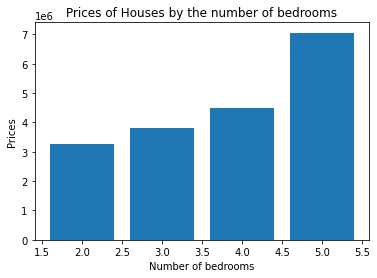

In [ ]:
##prices based on bedrooms

plt.bar(house_prices.bedrooms, house_prices.price )
plt.title('Prices of Houses by the number of bedrooms')
plt.xlabel('Number of bedrooms')
plt.ylabel('Prices')
plt.show()

In [ ]:
house_prices['bathrooms'] = house_prices['bathrooms'].apply(np.int64)

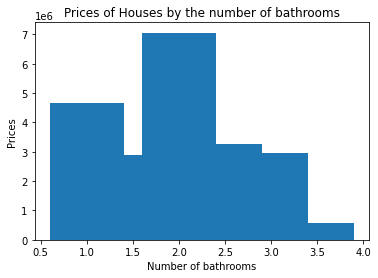

In [ ]:
##prices based on bathrooms

plt.bar(house_prices.floors, house_prices.price )
plt.title('Prices of Houses by the number of bathrooms')
plt.xlabel('Number of bathrooms')
plt.ylabel('Prices')
plt.show()

In [ ]:
df = house_prices.groupby(['floors'])['price'].mean().reset_index()
df.sort_values('floors')
df

,floors,price
0,1.0,442867.372138
1,1.5,557903.497029
2,2.0,644531.663320
3,2.5,957923.163121
4,3.0,574676.059900
5,3.5,511916.666667


In [ ]:
#changing floors to int 

df['floors'] = df['floors'].apply(np.int64)

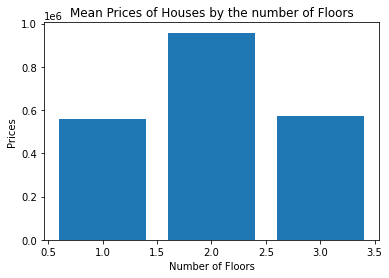

In [ ]:
#checking for prices of houses by floor numbers

plt.bar(df.floors, df.price )
plt.title('Mean Prices of Houses by the number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Prices')
plt.show()

In [ ]:
house_prices.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#Plotting prices of houses by grade

#grade = house_prices.groupby(['grade'])['price'].mean().reset_index()
#grade.sort_values('grade')
#grade

In [ ]:
#Scatter of grade against price

grade = house_prices[['grade','price']]
grade.head()


,grade,price
0,7,221900.0
1,7,538000.0
2,6,180000.0
3,7,604000.0
4,8,510000.0


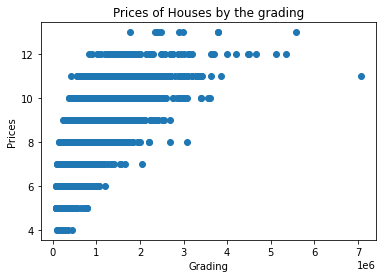

In [ ]:
#Scatter plot of grade of houses against prices

plt.scatter(grade.price, grade.grade)
plt.title('Prices of Houses by the grading')
plt.xlabel('Grading')
plt.ylabel('Prices')
plt.show()

In [ ]:
house_prices.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

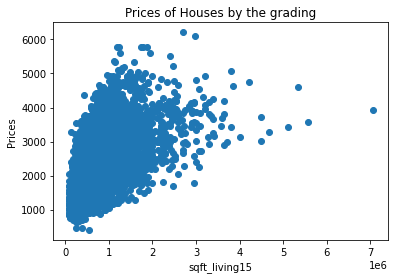

In [ ]:
#
df1= house_prices[['price','sqft_living15']]

plt.scatter(df1.price, df1.sqft_living15)
plt.title('Prices of Houses by the grading')
plt.xlabel('sqft_living15')
plt.ylabel('Prices')
plt.show()

####Regression

####1. Multiple Linear Regression

In [ ]:
house_prices.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3.0,1,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3.0,2,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2.0,1,770,10000,1.0,0,0,3,6,770,0,2720,8062


In [ ]:
#separating features from labels

X = house_prices.drop(['price','grade','sqft_living15'],axis=1).values
y = house_prices.iloc[:,0].values

In [ ]:
#Splitting to train and test

X_train,lin1X_test,y_train,lin1y_test = train_test_split(X,y , test_size=0.2, random_state = 0)

In [ ]:
#Training our model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Making predictions

lin1_pred = reg.predict(lin1X_test)
lin1_pred

array([836420.87964834, 818448.80005826, 664655.21346126, ...,
       215820.80459241, 334088.73263259, 803261.42665111])

In [ ]:
#checking for accuracy using mse
mse = np.mean((y_pred - y_test)**2)
mse

870532861361.8379

In [ ]:
#checking using r square

reg.score(X_test, y_test)

-5.807756889174387

######An R2 of 58.8% is acceptable. Being above half, it shows that X influences 59% of our y

In [ ]:
#checking for mean 
house_prices.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.106000e+04,21060.000000,21060.000000,21060.000000,2.106000e+04,21060.000000,21060.000000,21060.000000,21060.000000,21060.000000,21060.000000,21060.000000,21060.000000,21060.000000
mean,5.374548e+05,3.347673,1.741263,2070.700950,1.504725e+04,1.494824,0.007312,0.229630,3.410304,7.664767,1785.010684,285.690266,1987.026543,12724.924169
std,3.555683e+05,0.800492,0.709776,889.455855,4.141375e+04,0.539610,0.085202,0.757491,0.649055,1.159514,812.947458,433.596929,682.185515,27086.528041
min,7.800000e+04,2.000000,0.000000,440.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,440.000000,0.000000,399.000000,651.000000
25%,3.225000e+05,3.000000,1.000000,1430.000000,5.047750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7626.000000
75%,6.400000e+05,4.000000,2.000000,2530.000000,1.063750e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,550.000000,2360.000000,10080.000000
max,7.060000e+06,5.000000,6.000000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,4820.000000,6210.000000,871200.000000


####2. Quantile Regression

In [ ]:
house_prices.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#separating features from labels

X = house_prices[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','grade','sqft_living15']]
y = house_prices.iloc[:,0]

In [ ]:
#finding the regression coefficients for the median
quantiles = [0.25,0.5,0.75]
models = []
params = []

for qt in quantiles:
	mod = smf.quantreg(f"y ~ X", house_prices)
	res = mod.fit(q = qt )
	models.append(res);
	print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2579
Model:                       QuantReg   Bandwidth:                   2.461e+04
Method:                 Least Squares   Sparsity:                    4.093e+05
Date:                Mon, 23 Nov 2020   No. Observations:                21060
Time:                        09:32:46   Df Residuals:                    21051
                                        Df Model:                            8
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.671e+05   1.03e+04    -35.510      0.000   -3.87e+05   -3.47e+05
X[0]       -2.874e+04   1814.107    -15.841      0.000   -3.23e+04   -2.52e+04
X[1]       -1159.5473   2448.933     -0.473      0.636   -5959.644    3640.550
X[2]          96.2462      2.850     33.769      0.0

####Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
#separating dependent from independent variables

X = house_prices.drop(['price','grade','sqft_living15'],axis=1)
y = house_prices.iloc[:,0]

In [ ]:
#fittingour ridge model

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-10,2,5)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
#best params
search.fit(X,y)
search.best_params_

{'alpha': 0.0001}

In [ ]:
#
{'alpha': 0.0001}
abs(search.best_score_) 

54954473769.945435

In [ ]:
#fit the model with the ridge info and find the mean squared error
ridge = Ridge(normalize = True, alpha=0.0001)
ridge.fit(X, y)
model = (mean_squared_error(y_test, y_pred))
model

870532861361.8381

In [ ]:
reg.score(X_test, y_test)

-5.807756889174387

In [ ]:
#Checking coefficients
coef_dict_baseline = {}
for coef, feat in zip(reg.coef_,house_prices.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 178.67827089702587,
 'bedrooms': 35410.786735998205,
 'condition': 96.28866513566936,
 'floors': 553005.6521455552,
 'grade': 82.38960593798674,
 'price': -58205.62442104741,
 'sqft_above': -0.6496922364531201,
 'sqft_living': -0.09747206667452701,
 'sqft_lot': 7450.579379976891,
 'view': 46810.73568695389,
 'waterfront': 72132.95670286786}

In [ ]:
model1_mse = (mean_squared_error(y_test,y_pred))
model1_mse

870532861361.8381

####Lasso Regression

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#X and y
X = house_prices.drop(['price','grade','sqft_living15'],axis=1)
y = house_prices.iloc[:,0]

In [ ]:
#Standadizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:

#splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)


In [ ]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.5641660680278977
linear score: 0.5641692665343185
lasso MSE: 58295281171.07519
linear MSE: 58294853352.54743
lasso best estimator coef: [-45363.49903763  23029.62152862 234517.16720876   -627.40658601
   5352.65970377  48792.58779601  53743.99592534  30798.65808464
   8544.17668032   -914.96746303 -20804.41036903]
linear coef: [-45413.58103511  23068.72391053 124949.27003916   -648.25796722
   5345.15604037  48806.89075564  53759.12189441  30837.68401072
 108723.7859458   52468.39371358 -20822.4148314 ]


######None of the coefficients were shrunk to zero.Chances are that all the variables were important for the study.

In [ ]:
# calculating mse

mse = np.mean((y_pred - y_test)**2)
mse

750538031243.1787

In [ ]:
#R square
gridlasso.score(X_test,y_test)

0.5641660680278977

###Elastic Net Regression

In [ ]:
#X and y
X = house_prices.drop(['price','grade','sqft_living15'],axis=1)
y = house_prices.iloc[:,0]

In [ ]:
#Elastic Net model
#
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
#fit model and show best params
search.fit(X,y)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [ ]:
#best scores
abs(search.best_score_)

54995216045.58793

In [ ]:
#fitting model to X and y 
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X_train,y_train)


ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
mse=np.mean((y_pred - y_test)**2)
mse

750538031243.1787

In [ ]:
#Checking out the coefficients
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 25686.79151231179,
 'bedrooms': -39782.07230455063,
 'condition': 29538.96813504603,
 'floors': 6324.314330236459,
 'sqft_above': 103776.68380791595,
 'sqft_basement': 50621.69013768757,
 'sqft_living': 120142.77170968574,
 'sqft_lot': -919.144774000618,
 'sqft_lot15': -18529.425674492755,
 'view': 53935.96498217382,
 'waterfront': 47983.133627230796}

####Residual Plots

In [ ]:
#creating residuals
residuals = np.subtract(lin1_pred, lin1y_test)

In [ ]:
#Describing residuals
pd.DataFrame(residuals).describe()


,0
count,4.212000e+03
mean,4.669579e+03
std,2.292895e+05
min,-2.780852e+06
25%,-9.770014e+04
50%,2.201939e+04
75%,1.353788e+05
max,9.875625e+05


In [ ]:
#Finding mean
residuals.mean()

4669.578744943004

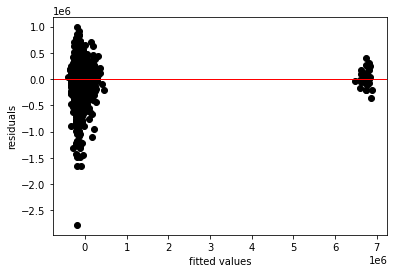

In [ ]:
#Plotting residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residuals')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

####Checking for heteroskedasticity 

######It is the variability of a given dependent variable unequal or even across the range of values of an independent variable that predicts it.

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)


In [ ]:
#preicting critical value

degree_of_freedom = len(y_pred) - 1
probability = 1-p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
critical_value

In [ ]:
#if test result is greater than critical value we reject null hypothesis
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')




the variances are homogeneous!


###Challenging the solution
######The features in the study were all not that collinear or had relations to each other so linear model was just the best to use to make predictions.